##### 1.1 - DISTRIBUIÇÃO NORMAL

2. ELM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

São deifnido as funções para treino do ELM.

In [2]:
def trainELMPseudoInverse(x, y, p):
    n = np.shape(x)[1]
    z = np.random.rand(n, p) - 0.5
    z = np.resize(z, (z.shape[0], z.shape[1]))

    for _ in range(maxEpocas):
        h = np.tanh(np.dot(x, z))
        w = np.dot(np.linalg.pinv(h), y)

    return z,w

def yELM(z, w, test):
    w = np.resize(w, (w.shape[0], 1))
    classified_H = np.tanh(np.dot(test, z))
    classified = np.sign(np.tanh(np.dot(classified_H, w)))
    return classified
    
def errorCalc(yEval, actualClass):
    error = np.absolute(actualClass - yEval)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = (yEval - actualClass)**2
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

Inicialmente define-se os input de dados para a distribuição normal.

In [3]:
N = 100

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

sigma_1 = 0.4**2
sigma_2 = 0.4**2

mu_1 = 2
mu_2 = 4

mean_1 = [mu_1, mu_1]
mean_2 = [mu_2, mu_2]

cov_1 = [[sigma_1, 0], [0, sigma_1]]
cov_2 = [[sigma_2, 0], [0, sigma_2]]

# data train
x1_train, y1_train = np.random.multivariate_normal(mean_1, cov_1, trainSize).T
x2_train, y2_train = np.random.multivariate_normal(mean_2, cov_2, trainSize).T

x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = np.resize(y2_train, (trainSize, 1))

# data test
x1_test, y1_test = np.random.multivariate_normal(mean_1, cov_1, testSize).T
x2_test, y2_test = np.random.multivariate_normal(mean_2, cov_2, testSize).T

x1_test = np.resize(x1_test, (testSize, 1))
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = np.resize(x2_test, (testSize, 1))
y2_test = np.resize(y2_test, (testSize, 1))

São definido as classes de treino e de testes.

In [4]:
# class train
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)


Então, é feito o treino para o ELM, bem como calculado o erro para cada uma das epocas

In [5]:
maxEpocas = 30
p = 3

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalc(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)


É realizado a exibição de resultados, com a curva de separação

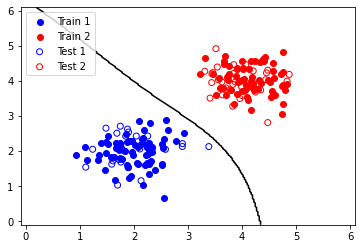

In [6]:

# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()


É feita o calculo e exibição tanto do erro quadrado quanto da acurácia do modelo.

Erro quadrado:     0.0000
Accuracy:     1.0000
Std Error:     0.0000


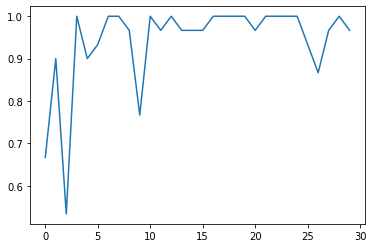

In [7]:

classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalc(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()